In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape

(6607, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df = df.dropna(axis = 1)

df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

**By looking to data columns we can detect that [Previous_Scores , Family_Income , Physical_Activity , Gender] have no effect on the final grade**

In [8]:
df = df.drop(columns = ['Previous_Scores' , 'Family_Income' , 'Physical_Activity' , 'Gender'] , axis = 1)

In [9]:
cat_cols = []

for col in df.columns:
    if df[col].dtypes == 'object':
        cat_cols.append(col)
        
cat_cols

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities']

In [10]:
for e in cat_cols:
    print(df[e].value_counts())
    print('----------------------')

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
----------------------
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
----------------------
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
----------------------
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
----------------------
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
----------------------
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
----------------------
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
----------------------
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
----------------------


In [11]:
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].replace({'Yes':1 , 'No':0}).astype(int)
df['Internet_Access'] = df['Internet_Access'].replace({'Yes':1 , 'No':0}).astype(int)
df['School_Type'] = df['School_Type'].replace({'Public':1 , 'Private':0}).astype(int)
df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes':1 , 'No':0}).astype(int)

/tmp/ipykernel_13/3503693923.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular_Activities'] = df['Extracurricular_Activities'].replace({'Yes':1 , 'No':0}).astype(int)
/tmp/ipykernel_13/3503693923.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internet_Access'] = df['Internet_Access'].replace({'Yes':1 , 'No':0}).astype(int)
/tmp/ipykernel_13/3503693923.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly ca

In [12]:
from sklearn.preprocessing import LabelEncoder


multi_class_columns = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Motivation_Level',
    'Peer_Influence'
]

le = LabelEncoder()

for col in multi_class_columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,School_Type,Peer_Influence,Learning_Disabilities,Exam_Score
0,23,84,1,0,0,7,1,1,0,1,2,0,67
1,19,64,1,2,0,8,1,1,2,1,0,0,61
2,24,98,2,2,1,7,2,1,2,1,1,0,74
3,29,89,1,2,1,8,2,1,1,1,0,0,71
4,19,92,2,2,1,6,2,1,3,1,1,0,70


(array([  68., 1384., 2906., 2019.,  175.,   16.,   11.,    7.,   11.,
          10.]),
 array([ 55. ,  59.6,  64.2,  68.8,  73.4,  78. ,  82.6,  87.2,  91.8,
         96.4, 101. ]),
 <BarContainer object of 10 artists>)

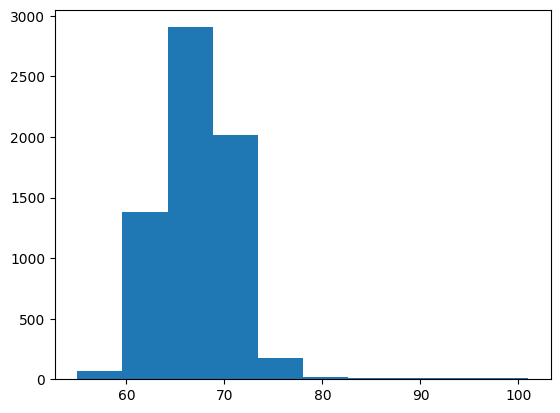

In [14]:
import matplotlib.pyplot as plt

plt.hist(x = 'Exam_Score' , data = df)

In [15]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

In [16]:
df_no_outliers = df[(df['Exam_Score'] > lower_bound) & (df['Exam_Score'] <= upper_bound)]

(array([  62.,  248.,  635., 1180., 1468., 1383.,  950.,  445.,  154.,
          21.]),
 array([58. , 59.9, 61.8, 63.7, 65.6, 67.5, 69.4, 71.3, 73.2, 75.1, 77. ]),
 <BarContainer object of 10 artists>)

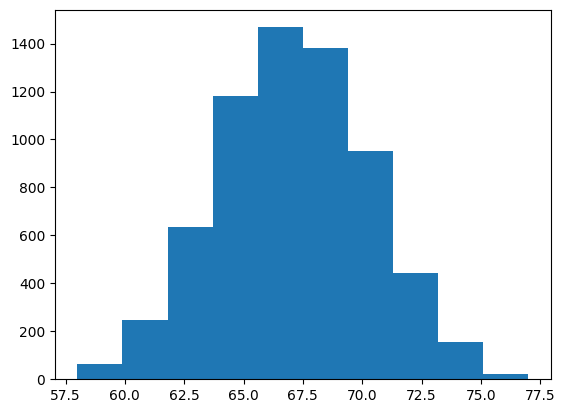

In [17]:
plt.hist(x = 'Exam_Score' , data = df_no_outliers)

In [18]:
X = df_no_outliers.drop('Exam_Score' , axis = 1)
y = df_no_outliers['Exam_Score']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [20]:
print(f'X_train shape = {X_train.shape} / X_test shape = {X_test.shape} / y_train shape = {y_train.shape} / y_test shape = {y_test.shape}') 

X_train shape = (5236, 12) / X_test shape = (1310, 12) / y_train shape = (5236,) / y_test shape = (1310,)


In [21]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , y_train)

prediction = lr.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1.99
R^2 Score: 0.82


<Axes: xlabel='Exam_Score'>

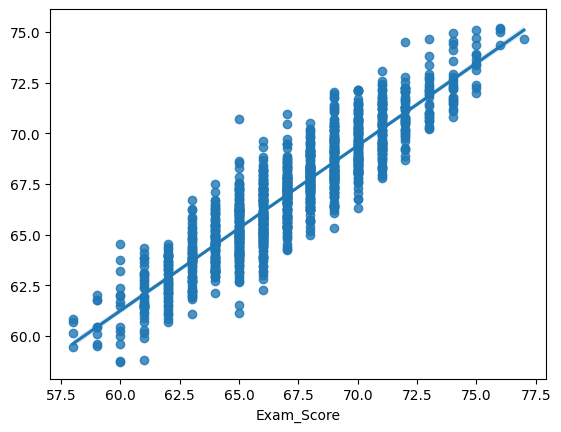

In [24]:
import seaborn as sns
sns.regplot(data = df_no_outliers , x = y_test , y = prediction , scatter=True, fit_reg=True)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

print("R² Score (Polynomial Degree 2):", r2_score(y_test, y_pred_poly))

R² Score (Polynomial Degree 2): 0.8940039897904328
